In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import os
import json


In [2]:
# load all data from the LogFiles folder
# list all subfolder
subfolders = [f.path for f in os.scandir('LogFiles') if f.is_dir() ]


# create class for data srtucture
class dataStructure:
    # init function, for angles, closest_angles, delta, infofile
    def __init__(self, angles, closest_angles, delta, nLaser, error, totalLaserMovement):
        self.angles = angles
        self.closest_angles = closest_angles
        self.delta = delta
        self.infofile = infofile
        self.nLaser = nLaser
        self.error = error
        self.totalLaserMovement = totalLaserMovement

# create empty list to store all data
data = []
for folder in subfolders:
    # new data structure item

    # load angles.npy
    angles = np.load(folder + '/angles.npy')
    # load closest_angles.npy
    closest_angles = np.load(folder + '/closest_angles.npy')
    # load delta.npy
    delta = np.load(folder + '/deltas.npy')

    # load content info.json
    with open(folder + '/info.json') as f:
        infofile = json.load(f)

    # extract nLaser
    nLasers = infofile['nLasers']
    # extract error
    error = infofile['error']
    # extract totalLaserMovement
    totalLaserMovement = infofile['totalLaserMovement']



    # create data structure item
    d = dataStructure(angles, closest_angles, delta, nLasers, error, totalLaserMovement)

    # append data structure to data
    data.append(d)


# Visualise the data from the log files

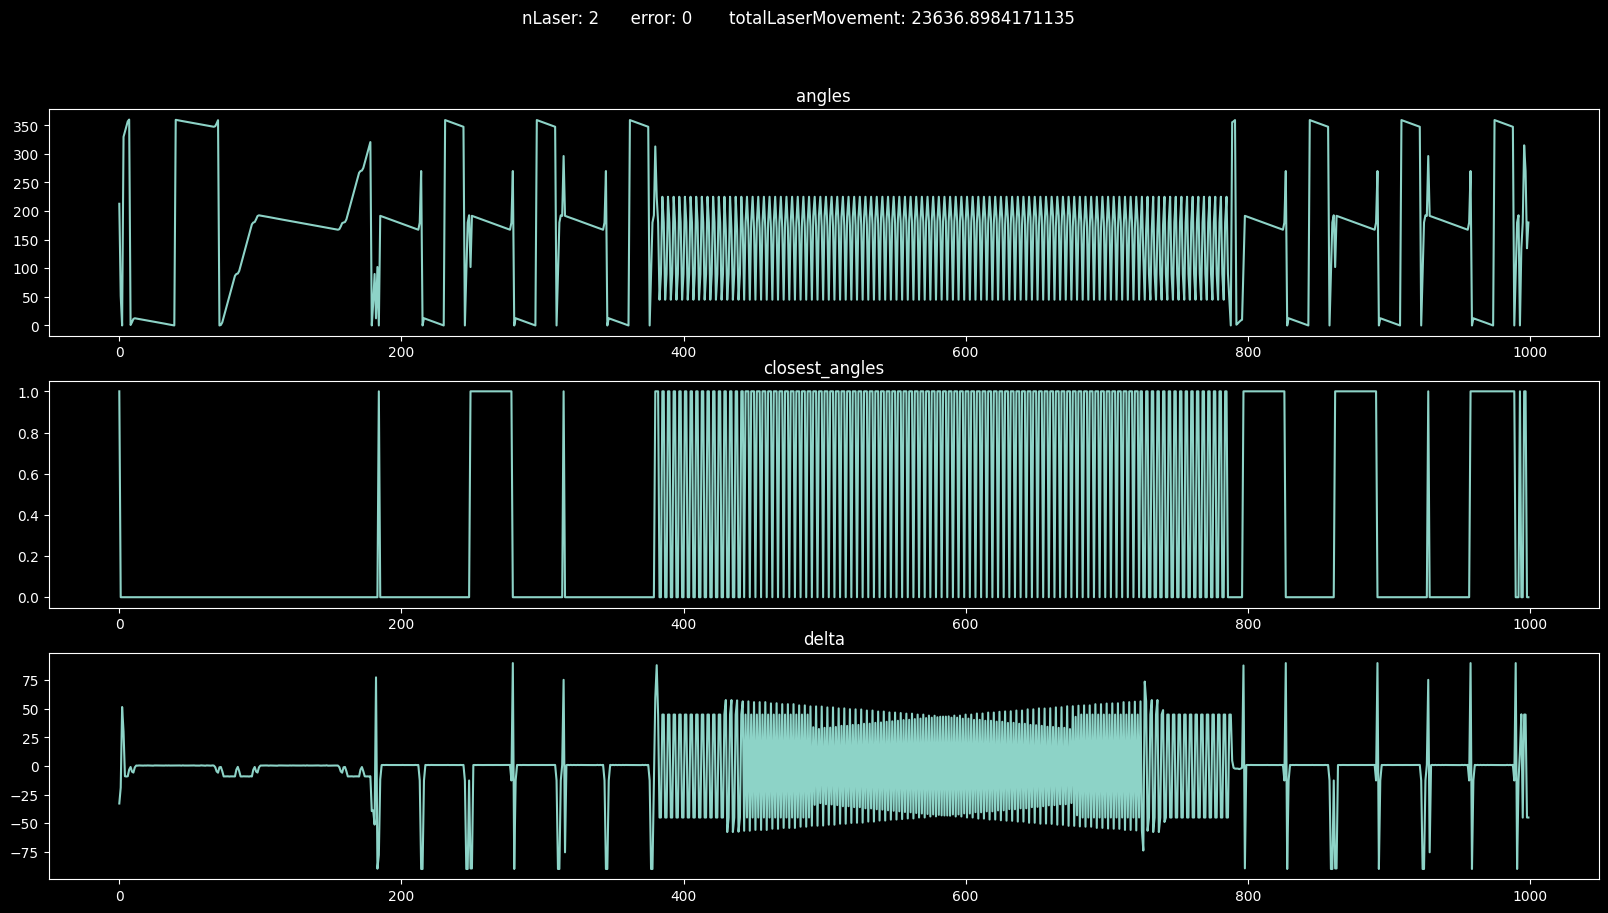

delta min: -90.0
delta max: 90.0


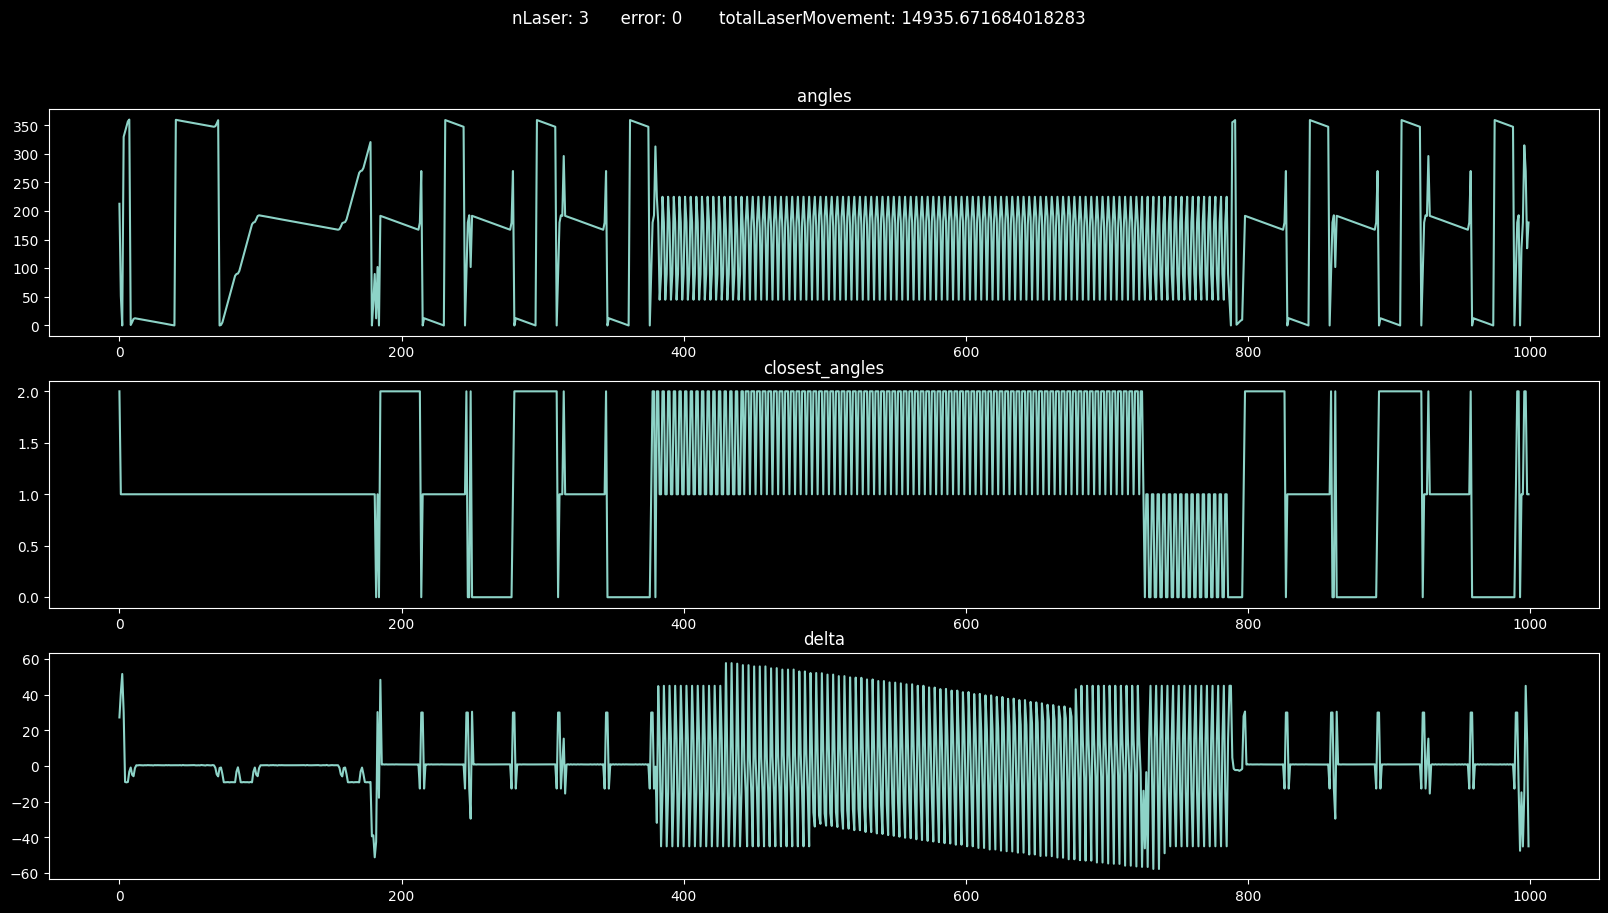

delta min: -57.71291102624039
delta max: 57.71291102624002


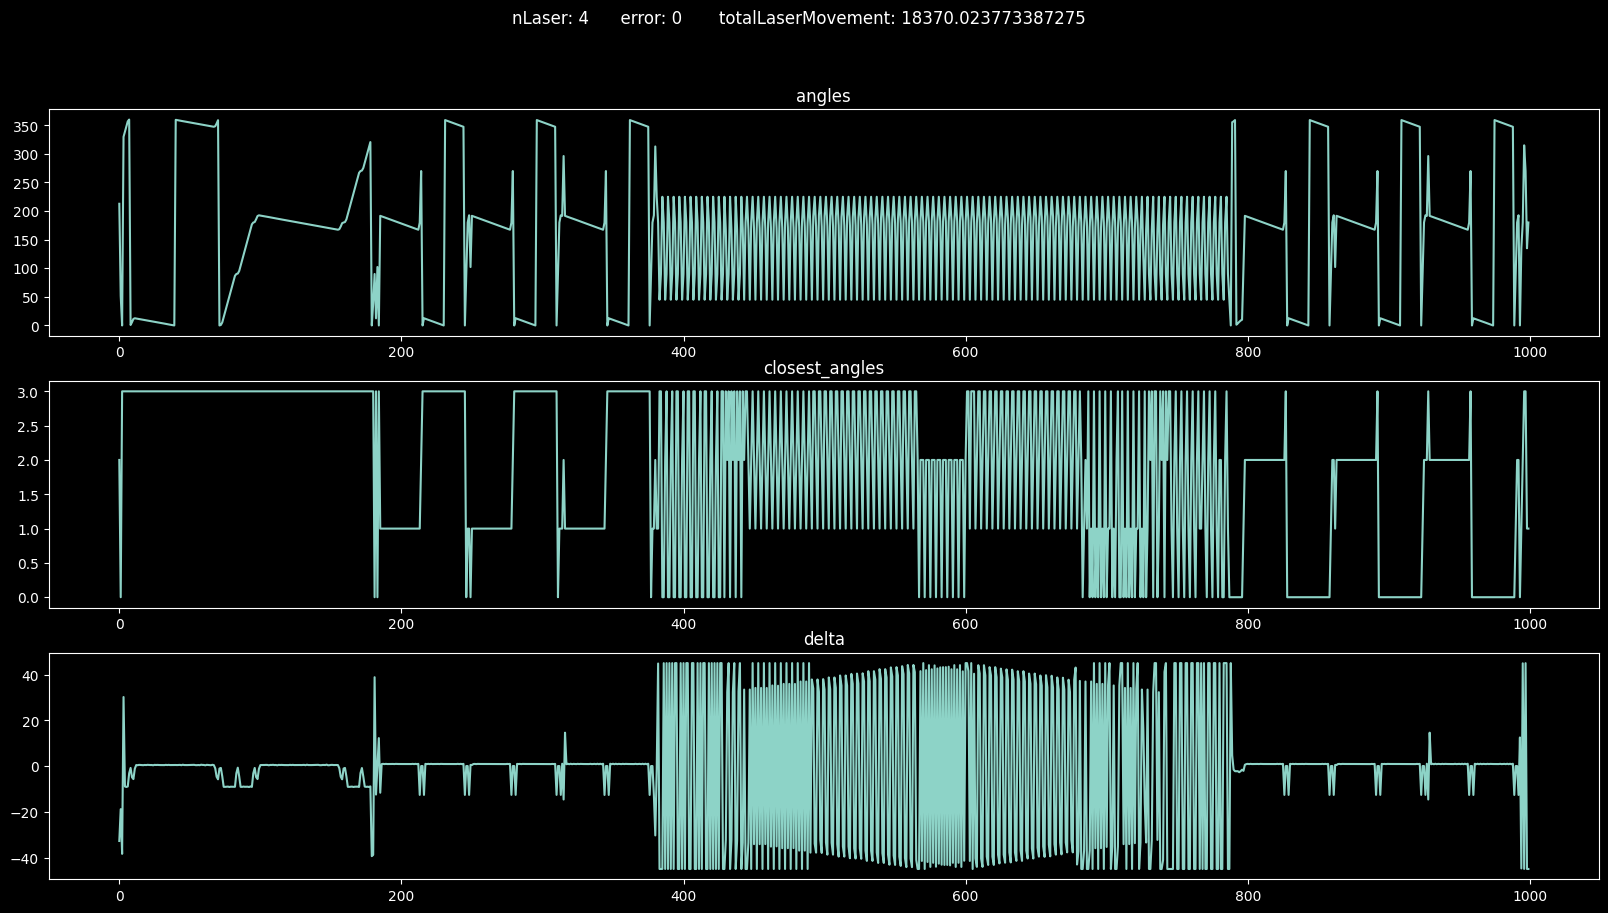

delta min: -45.000000000000455
delta max: 45.00000000000028


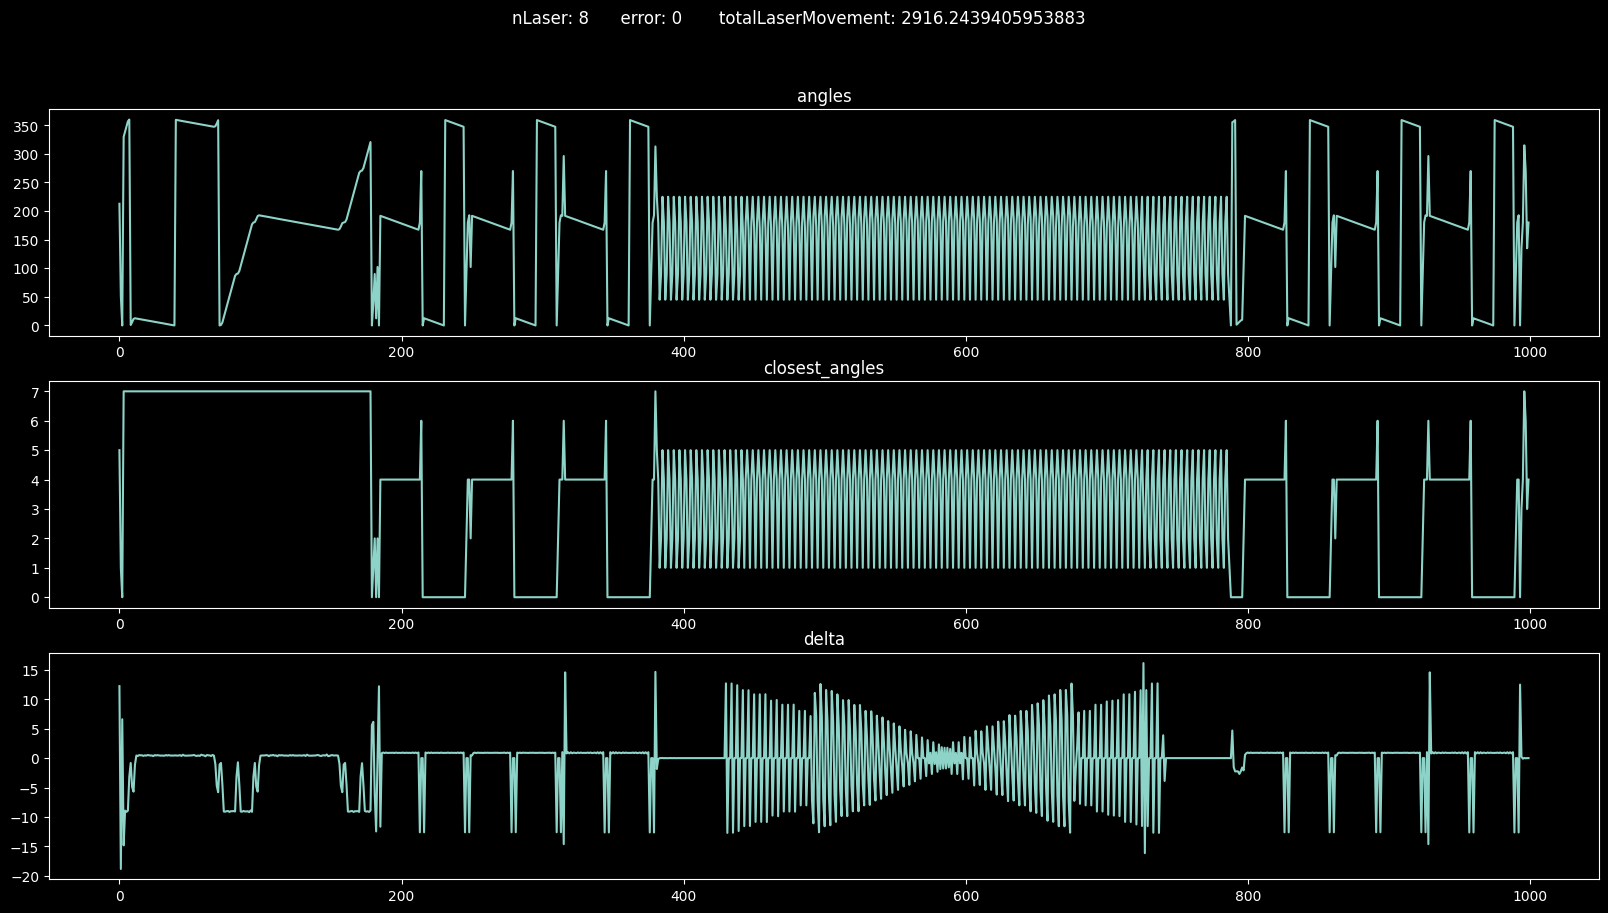

delta min: -18.85566155249657
delta max: 16.159085463085717


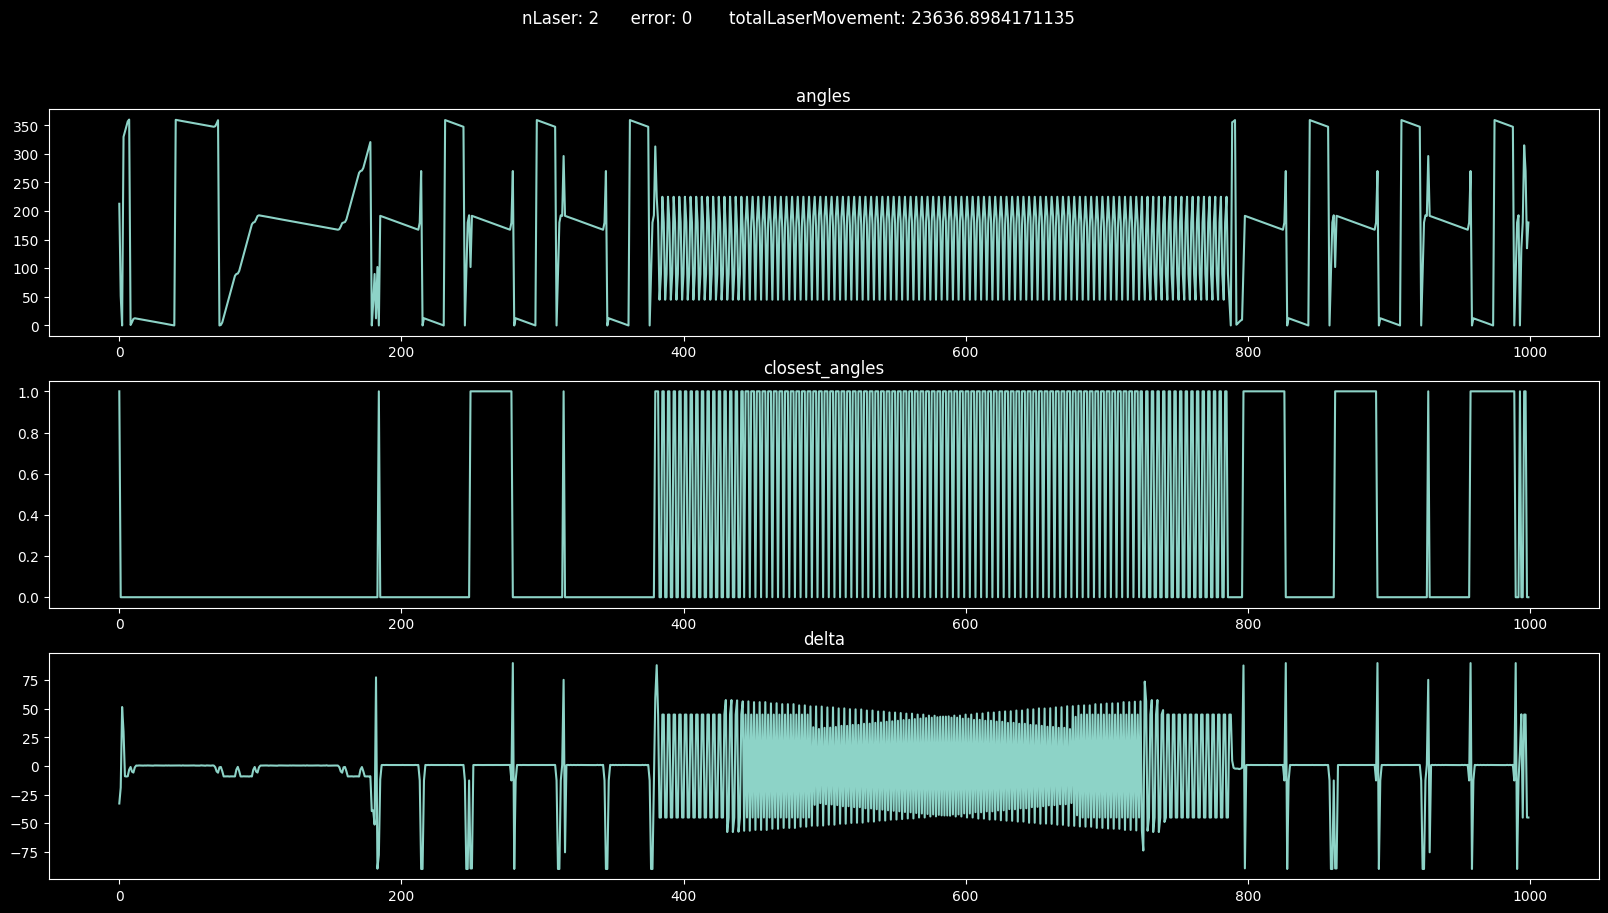

delta min: -90.0
delta max: 90.0


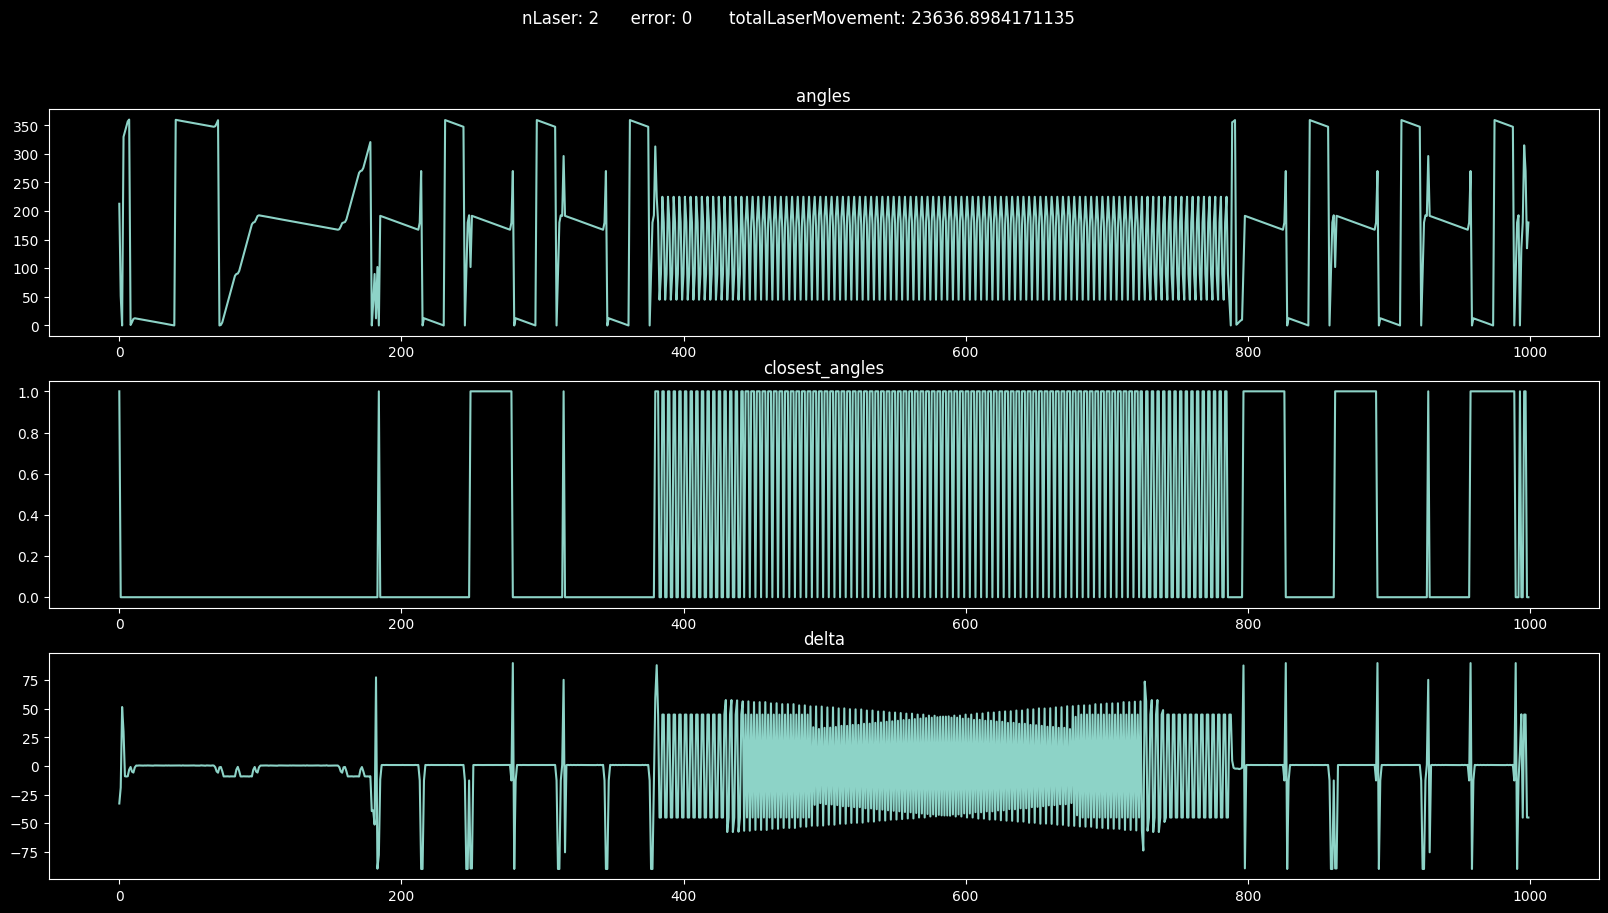

delta min: -90.0
delta max: 90.0


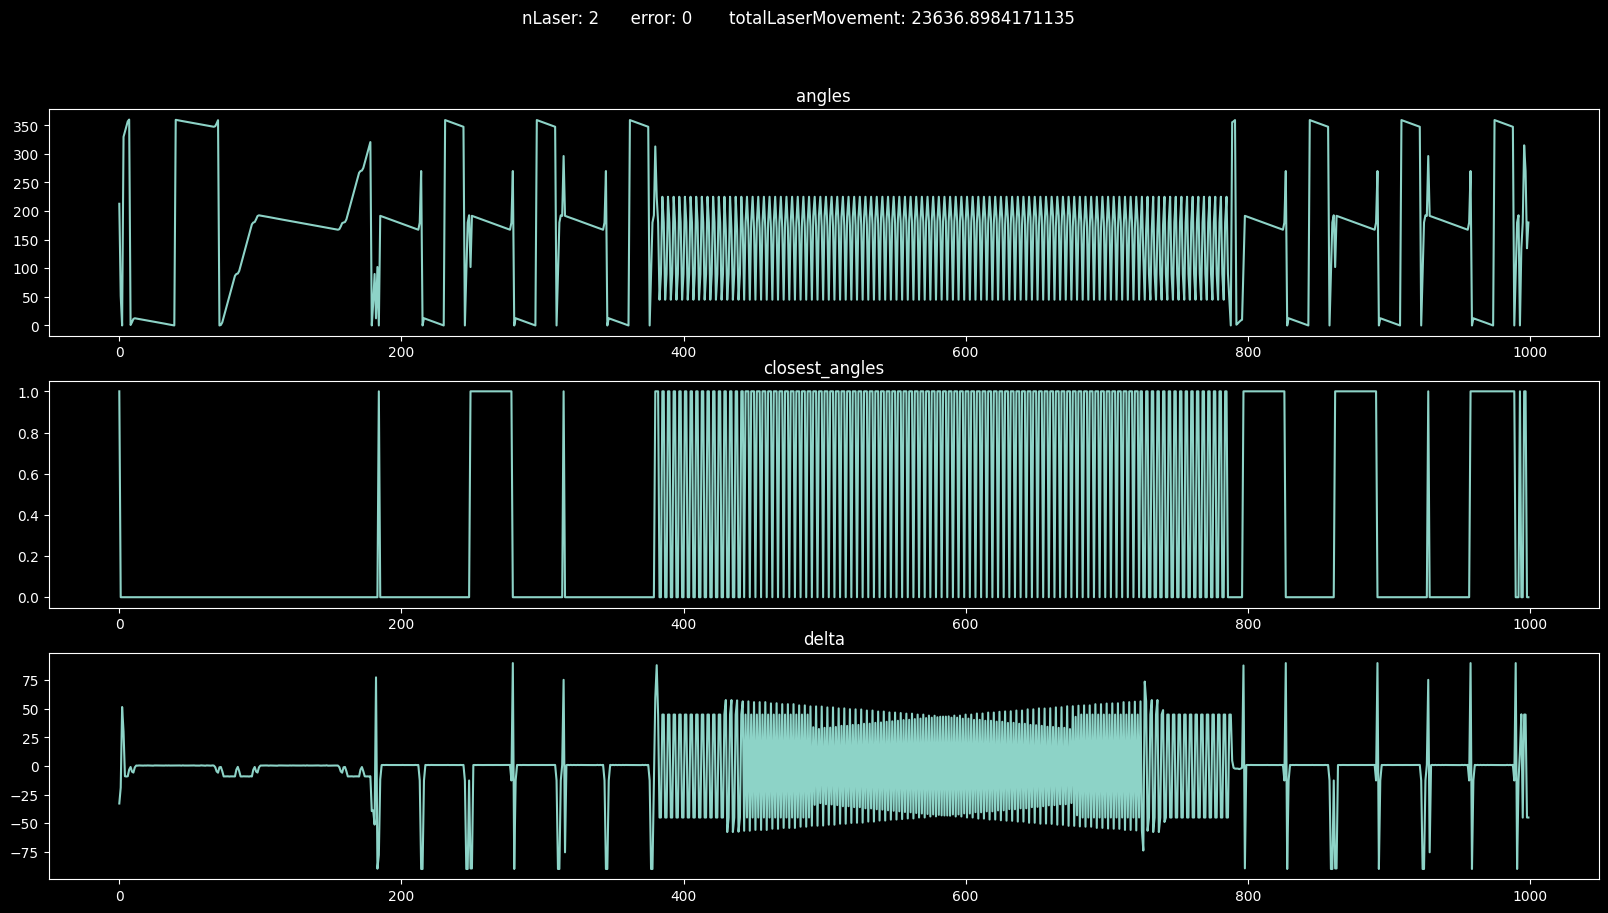

delta min: -90.0
delta max: 90.0


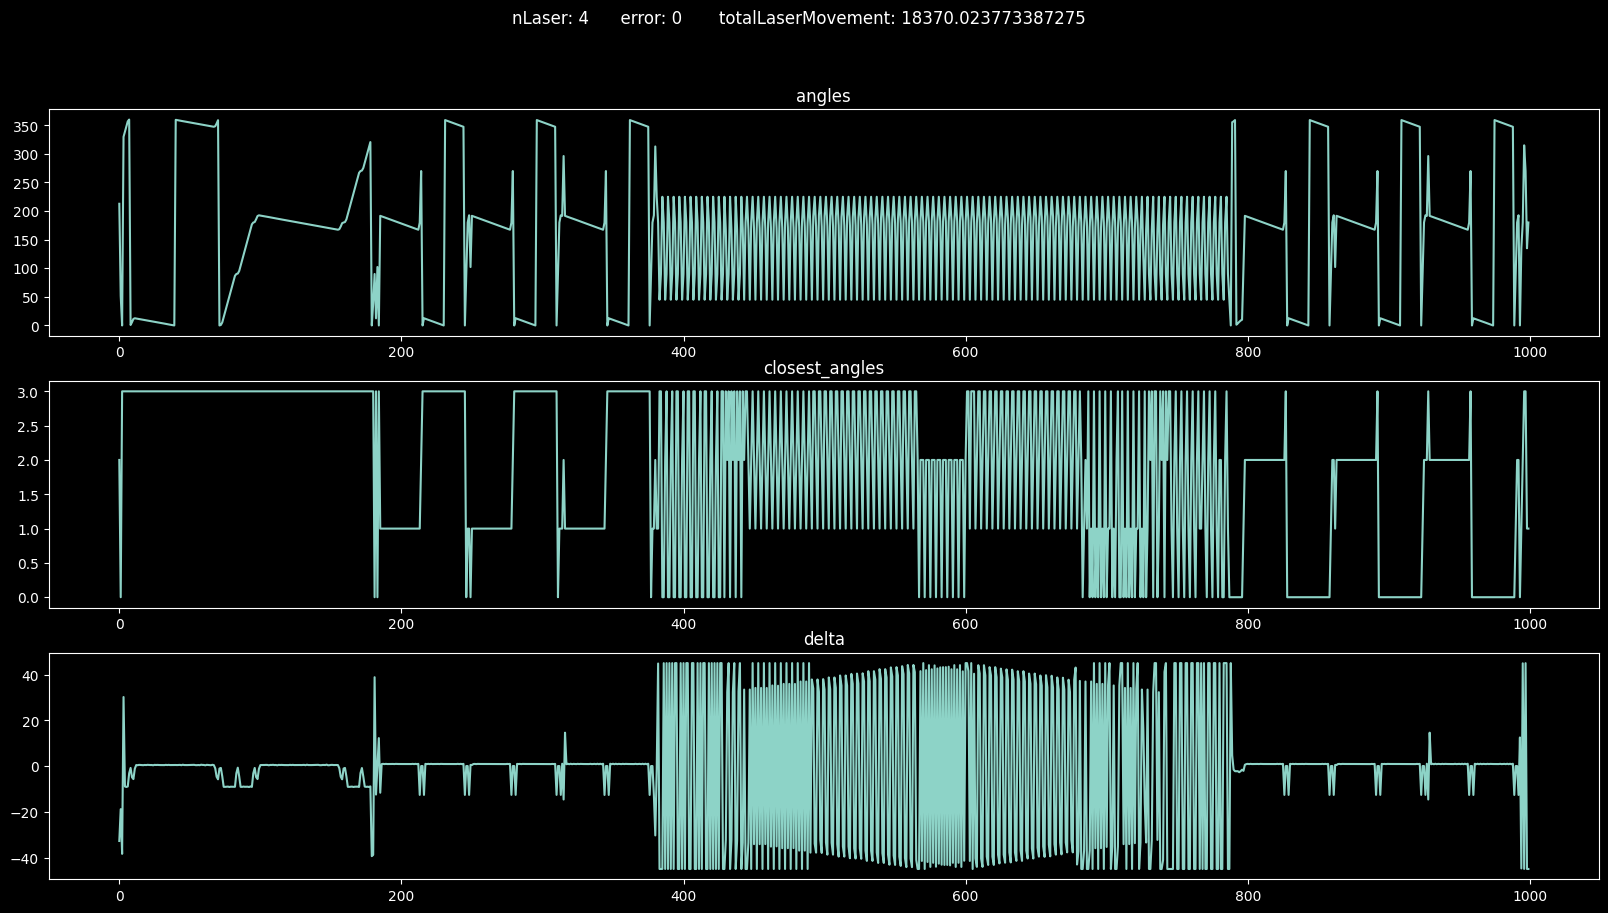

delta min: -45.000000000000455
delta max: 45.00000000000028


In [3]:
# for each data structure item create a new subplot with the angles, closest_angles and delta
for i in range(len(data)):
    # create new figure
    fig = plt.figure(figsize=(20, 10))
    # set title
    fig.suptitle('nLaser: ' + str(data[i].nLaser) + '      error: ' + str(data[i].error) + '       totalLaserMovement: ' + str(data[i].totalLaserMovement))

    # create new subplot
    ax = fig.add_subplot(311)
    # plot angles
    
    ax.plot(data[i].angles, label='angles')
    plt.title('angles')
    # plot closest_angles

    ax = fig.add_subplot(312)
    ax.plot(data[i].closest_angles, label='closest_angles')
    plt.title('closest_angles')
    # plot delta

    ax = fig.add_subplot(313)
    ax.plot(data[i].delta, label='delta')
    plt.title('delta')

    # show plot
    plt.show()

    # print delta min und max
    print('delta min: ' + str(np.min(data[i].delta)))
    print('delta max: ' + str(np.max(data[i].delta)))